## Diferencias finitas: convección no lineal
### Juan S. Hincapié - Carlos Duque-Daza


### Esquemas espaciales

$$
\begin{aligned}
& \text{FFD:} \frac{du}{dx} \approx \frac{u_{i+1}-u_{i}}{\Delta x} +  O(\Delta x) \\
& \text{BFD:}    \frac{du}{dx} \approx \frac{u_{i}-u_{i-1}}{\Delta x} +  O(\Delta x) \\
& \text{CFD:} \frac{du}{dx} \approx \frac{u_{i+1}-u_{i-1}}{2\Delta x} +  O(\Delta x)^2 
\end{aligned}
$$


### Esquemas temporales

<div align='justify'> Los esquemas anteriores sirven para aproximar derivadas espaciales. ¿Qué hacemos con las derivadas temporales? Debemos seguir usando Euler en sus diferentes versiones:</div>

Tenindo la siguiente EDP:
$$
\frac{du}{dt} = \phi (t,x,u)
$$

Esquema explícito (Euler hacia adelante):
$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = \phi_i^{n} (t,x,u)
$$

Esquema implícito (Euler hacia atrás):
$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = \phi_i^{n+1} (t,x,u)
$$

Esquema smiimplícito (Crank-Nicolson):
$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = \frac{1}{2}\phi_i^{n+1} (t,x,u)  + \frac{1}{2}\phi_i^{n} (t,x,u)
$$

### Esquema semimplícito ¿Cómo se programa?

<div align='justify'> Siguiendo la misma metodología que hemos empleado para estudiar los esquemas temporales, ahora vamos a estudiar la lógica e implemtanción del método semiplícito resolvienod la sigueinte EDP:</div>


$$
    \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}  = 0
$$

Las condiciones de frontera:
* $u(t,0) = 1$ y  $u(t,2) = 1$

Condiciones iniciales:
* $u = 2$ para $0.5 \leq x \leq 1.0$ y $u =1$ en el resto del dominio

Vamos a usar un esquema espacial hacia atrás, y un esquema temporal implícito (como ya se había dicho):

$$
    \frac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t} = -\frac{1}{2}u^{n+1}_{i}\frac{u^{n+1}_{i}-u^{n+1}_{i-1}}{\Delta x} -\frac{1}{2}u^{n}_{i}\frac{u^{n}_{i}-u^{n}_{i-1}}{\Delta x}
$$

Todo lo desconocido lo dejamos al lado izquierdo de la ecuación, mientras que lo conocido lo dejaremos al lado derecho. Además, por abreviar notación, $\alpha = \frac{\Delta t}{\Delta x}$

$$
    -(\alpha u^{n+1}_{i})u^{n+1}_{i-1} + (\alpha u^{n+1}_{i} + 1) u^{n+1}_{i} = (\alpha u^{n}_{i})u^{n}_{i-1} + (-\alpha u^{n}_{i} + 1) u^{n}_{i}
$$

Nuestro dominio espacial 1D tiene 7 nodos:

<div align='center'> 0--------1--------2--------3--------4--------5--------6</div><br>

Obentemos algunas ecuaciones:
\begin{align*}
    & i=1 \rightarrow (\alpha u^{n+1}_{1} + 1) u^{n+1}_{1} = (\alpha u^{n+1}_{1})u^{n+1}_{0} + (\alpha u^{n}_{1})u^{n}_{0} + (-\alpha u^{n}_{1} + 1) u^{n}_{1}\\
    & i=2 \rightarrow -(\alpha u^{n+1}_{2})u^{n+1}_{1} + (\alpha u^{n+1}_{2} + 1) u^{n+1}_{2} = (\alpha u^{n}_{2})u^{n}_{1} + (-\alpha u^{n}_{2} + 1) u^{n}_{2}\\
    & \vdots \\
    & i=5 \rightarrow -(\alpha u^{n+1}_{5})u^{n+1}_{4} + (\alpha u^{n+1}_{5} + 1) u^{n+1}_{5} = (\alpha u^{n}_{5})u^{n}_{4} + (-\alpha u^{n}_{5} + 1) u^{n}_{5}
\end{align*}


<div align='justify'>¿Se podrá condensar el sistema de ecuaciones como $Ax = b$? ¿Por qué? ¿Qué deberíamos hacer?</div>

$$
\left[\begin{array}{ccccccc}
(\alpha u^{n}_{1} + 1) & 0 & 0 & 0 & 0   \\
-\alpha u^{n}_{2} & (\alpha + u^{n+1}_{2}) & 0 & 0 & 0   \\
0 & -\alpha u^{n}_{3} & (u^{n}_{3} + 1) & 0 & 0   \\
0 & 0 & -\alpha u^{n}_{4} & (u^{n}_{4} + 1) & 0   \\
0 & 0 & 0 & -\alpha u^{n}_{5} & (u^{n}_{5} + 1)   \\
\end{array}\right]\cdot
\left[\begin{array}{c}
u_{1}\\
u_{2}\\
u_{3}\\
u_{4}\\
u_{5}
\end{array}\right] ^{n+1} = 
\left[\begin{array}{c}
(2\alpha u^{n}_{1})u^{n}_{0} + (-\alpha u^{n}_{1} + 1) u^{n}_{1}\\
(\alpha u^{n}_{2})u^{n}_{1} + (-\alpha u^{n}_{2} + 1) u^{n}_{2}\\
(\alpha u^{n}_{3})u^{n}_{2} + (-\alpha u^{n}_{3} + 1) u^{n}_{3}\\
(\alpha u^{n}_{4})u^{n}_{3} + (-\alpha u^{n}_{4} + 1) u^{n}_{4}\\
(\alpha u^{n}_{5})u^{n}_{4} + (-\alpha u^{n}_{5} + 1) u^{n}_{5}
\end{array}\right]
$$

<div align='justify'>¿Qué se debe hacer para resolver este sistema de ecuaciones?</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

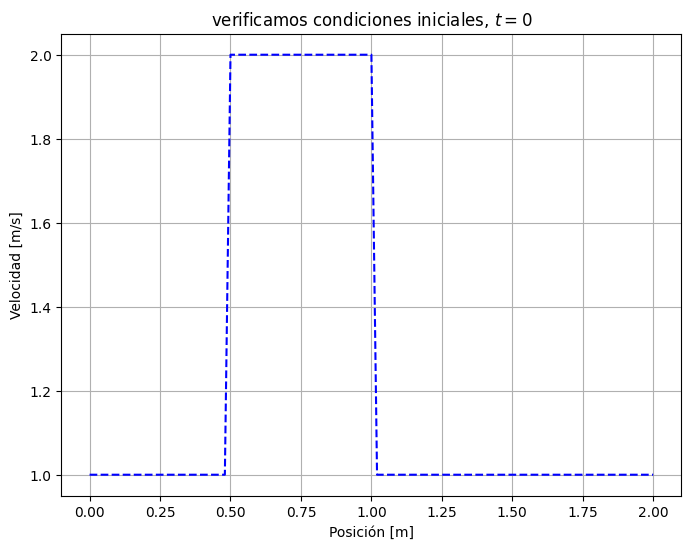

In [179]:
# Paso 00: discretizar el dominio espacial

# Paso 01: discretizar el dominio temporal

# Paso 03: crear vector de velocidad almacenar
# el valor de la velocidad en cada punto discreto

# Paso 04: incluimos condiciones inciales


# Paso 05: verificar condiciones iniciales
plt.figure(1, figsize=(8,6))
plt.plot(x, up, "--b")
plt.title("verificamos condiciones iniciales, $t=0$")
plt.xlabel("Posición [m]")
plt.ylabel("Velocidad [m/s]")
plt.grid()
plt.show()

<div align='justify'>¿La matriz A es de coeficientes constantes? ¿En qué momento se debería llenar?</div>

In [180]:
# Paso 06: crear función para llenar la matriz

# Paso 07: crear función para llenar el vector de cargas


# Paso 08: hacemos un vector de tiempo para almacenar el futuro


# Paso 09: creamos una matriz y vector para almacenar los coeficientes


# Paso 10: constantes del problema

    

In [96]:
# Paso 11: resolvemos todo el problema sin correción de tiempo


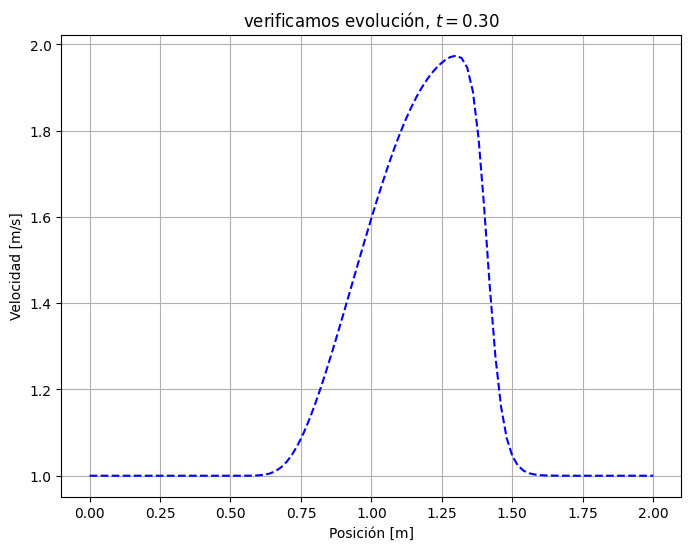

In [97]:
# Paso 12: plotear
plt.figure(2, figsize=(8,6))
plt.plot(x, uf, "--b")
plt.title("verificamos evolución, $t={:.2f}$".format(t[-1]))
plt.xlabel("Posición [m]")
plt.ylabel("Velocidad [m/s]")
plt.grid()
plt.show()

In [181]:
# Paso 13: resolvemos todo el problema con correción de tiempo


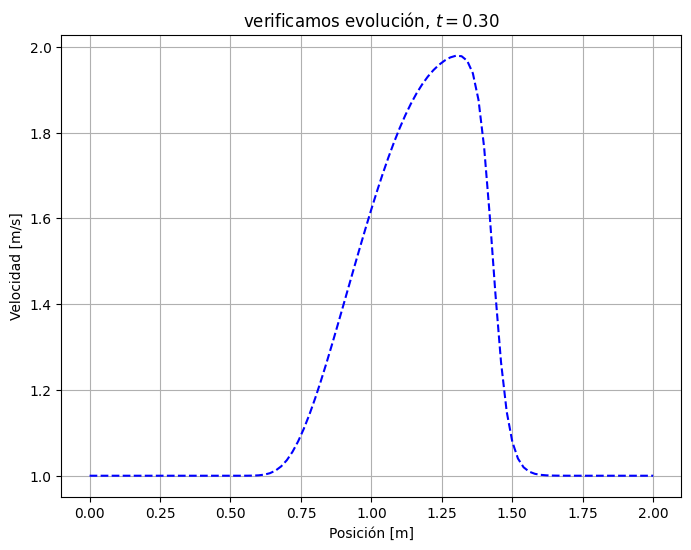

In [182]:
# Paso 14: plotear
plt.figure(3, figsize=(8,6))
plt.plot(x, ufc, "--b")
plt.title("verificamos evolución, $t={:.2f}$".format(t[-1]))
plt.xlabel("Posición [m]")
plt.ylabel("Velocidad [m/s]")
plt.grid()
plt.show()

### Actividad
* ¿Podría poner el solucionador en una función? Así queda más fácil y se pueden hacer experimentos numéricos
* ¿Qué ocurre si $dt=0.1$ y $dx=0.05$? ¿Qué número de Courant nos da? ¿Se vuelve inestable?
* Resuelva el problema anterior usando esquema espacial centrado ¿Cómo queda nuestra matriz de coeficientes?
* Ahora intentelo usando un esquema espacial hacia adelante